In [241]:
import torch
import torchvision

In [204]:
x = torch.tensor([3.0, 4.0])

w = torch.randn(2, requires_grad=True)
b = torch.randn(1, requires_grad=True)

parameters = [w, b]


In [205]:
# forward pass
y = x @ w + b

L = y ** 2
# backpropagation
for p in parameters:
    p.grad = None
L.backward()

# gradient descent / update
for p in parameters:
    p.data -= 0.01 * p.grad

y

tensor([-1.2808], grad_fn=<AddBackward0>)

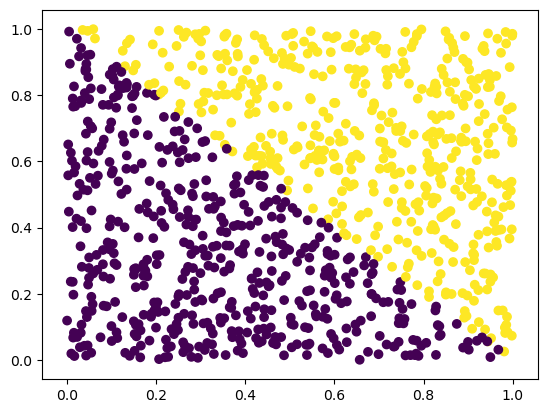

In [223]:
inputs = torch.rand(1000, 2)
labels = torch.tensor([1 if x[0] + x[1] > 1 else 0 for x in inputs])

# plot the data
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels)


In [234]:
w = torch.randn(2, requires_grad=True)
b = torch.randn(1, requires_grad=True)

parameters = [w, b]


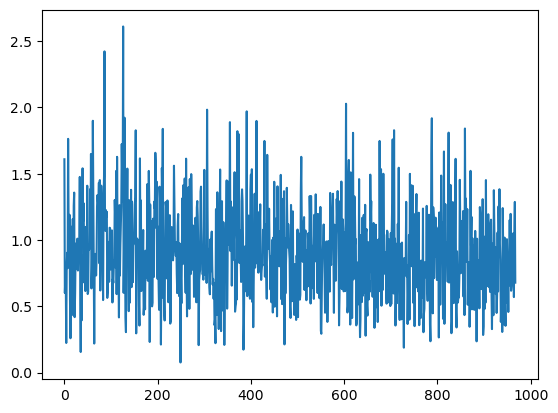

In [239]:
lr = 0.1
batch_size = 32
Ls = []
for i in range(len(inputs) - batch_size):
    ix = torch.randint(0, len(inputs), (batch_size,))
    x = inputs[ix]
    label = labels[ix]

    # forward pass
    y = x @ w + b
    y = torch.sigmoid(y)

    L = ((y - label) ** 2).sum()
    Ls.append(L.item())

    # backpropagation
    for p in parameters:
        p.grad = None
    L.backward()

    # gradient descent / update
    for p in parameters:
        p.data -= lr * p.grad

plt.plot(Ls)

In [240]:
# test accuracy
y = inputs @ w + b
y = torch.sigmoid(y)
y = torch.tensor([1 if x > 0.5 else 0 for x in y])
(y == labels).sum() / len(labels)


tensor(0.9900)

In [293]:
data = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor())
loader = torch.utils.data.DataLoader(data, batch_size=32, shuffle=True)


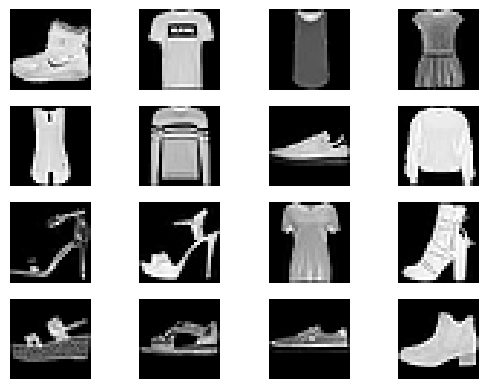

In [304]:
# show a grid of images
fig, ax = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(data[i * 4 + j][0].squeeze(), cmap='gray')
        ax[i, j].axis('off')


In [280]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.randn(768, 10, requires_grad=True)
        self.b = torch.randn(10, requires_grad=True)
#        self.linear = torch.nn.Linear(784, 10)
        
    def forward(self, x):
#        x = self.linear(x)
        x = x @ self.w + self.b
        return torch.sigmoid(x)

model = Classifier()


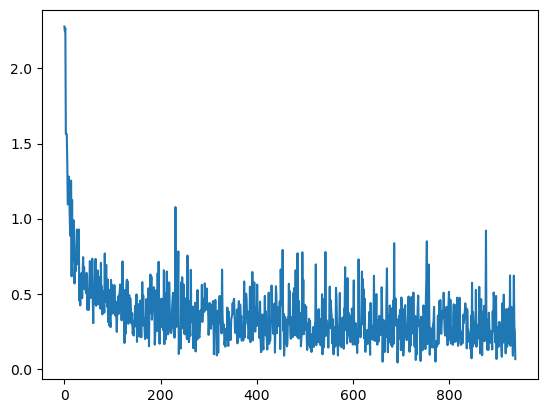

In [283]:
lr = 0.3
batch_size = 32
Ls = []
for epoch in range(3):
    for x, label in loader:
        x = x.view(-1, 784)

        # forward pass
        y = model(x)

        L = torch.nn.functional.cross_entropy(y, label)
        Ls.append(L.item())

        # backpropagation
        model.zero_grad()
        L.backward()

        # gradient descent / update
        for p in model.parameters():
            p.data -= lr * p.grad

plt.plot(Ls)

In [276]:
correct = 0
for x, label in loader:
    x = x.view(-1, 784)

    # forward pass
    y = x @ w + b
    y = torch.sigmoid(y)

    y = torch.argmax(y, dim=1)
    correct += (y == label).sum()

correct / len(data)

tensor(0.6608)

In [266]:
torch.argmax(y)

tensor(6)

In [277]:
# test accuracy
data = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor())
loader = torch.utils.data.DataLoader(data, batch_size=32, shuffle=True)

correct = 0
for x, label in loader:
    x = x.view(-1, 784)

    # forward pass
    y = x @ w + b
    y = torch.sigmoid(y)

    y = torch.argmax(y, dim=1)
    correct += (y == label).sum()

correct / len(data)

tensor(0.6675)

In [302]:
# Generative Adversarial Networks

class Generator(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(100, 256),  # w, b
            torch.nn.ReLU(),
            torch.nn.Linear(256, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 784),
            torch.nn.Tanh()
        )
        
    def forward(self, x):
        x = self.main(x)
        return x

class Discriminator(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(784, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 1),
            torch.nn.Sigmoid()
        )

        
    def forward(self, x):
        x = self.main(x)
        return x

G = Generator()
D = Discriminator()
        

In [301]:
data = torchvision.datasets.FashionMNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor())
loader = torch.utils.data.DataLoader(data, batch_size=32, shuffle=True)

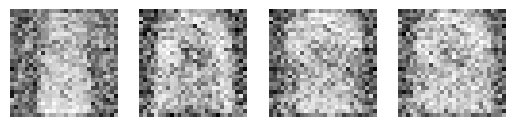

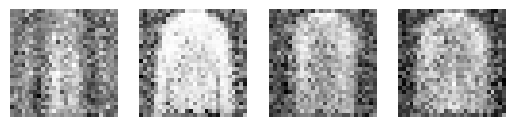

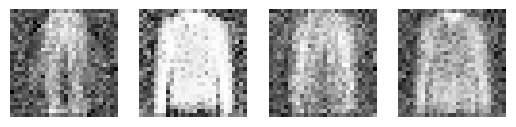

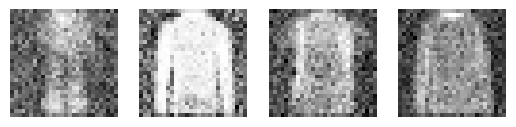

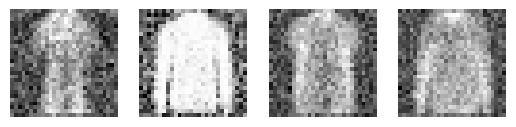

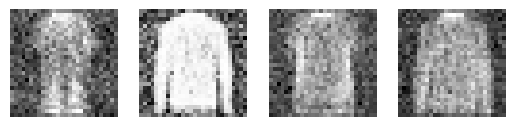

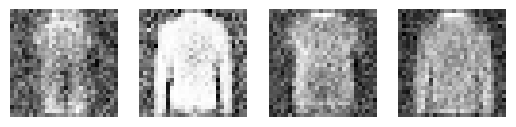

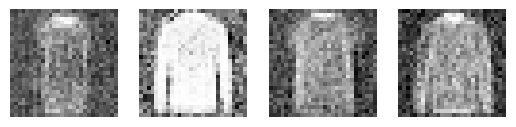

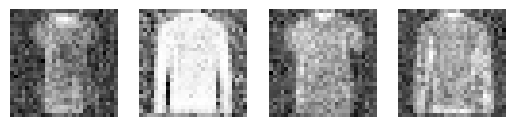

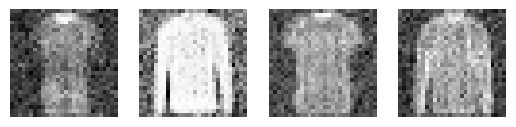

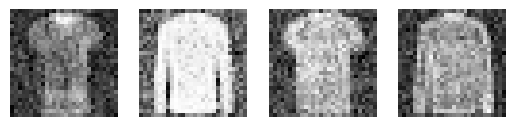

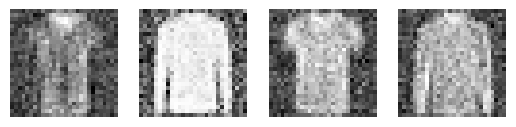

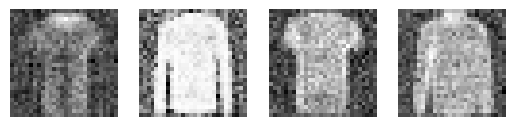

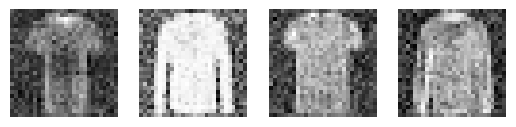

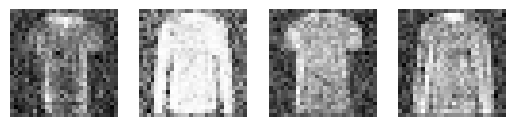

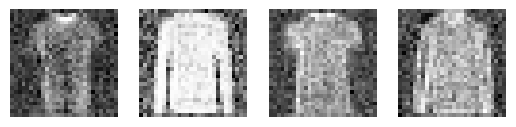

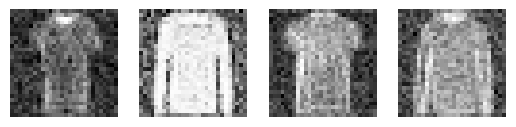

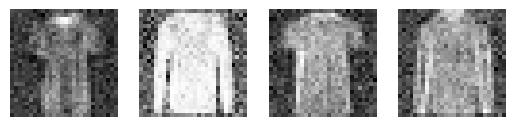

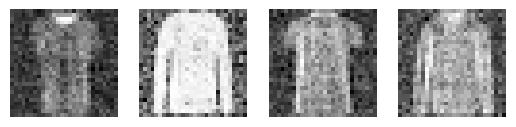

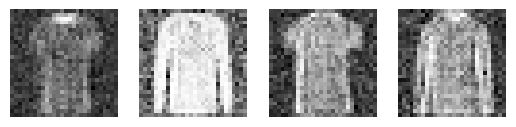

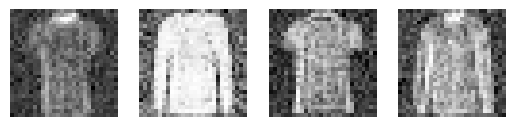

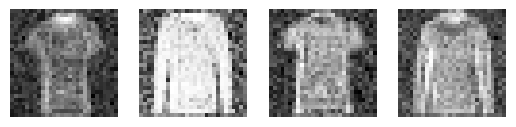

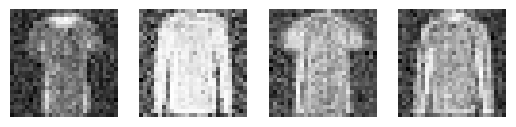

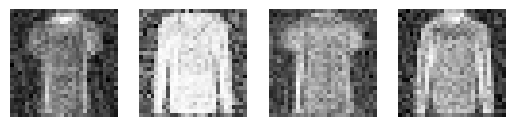

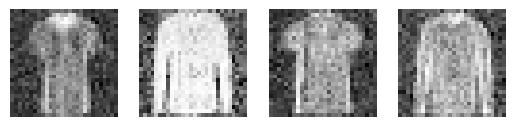

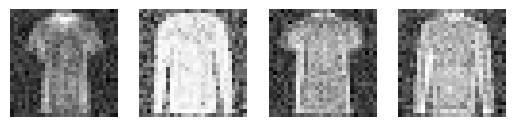

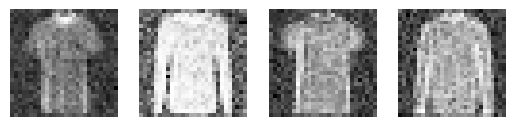

KeyboardInterrupt: 

In [303]:
lr = 0.01

static_noise = torch.randn(4, 100)

for i in range(100):
  for real, _ in loader:
      real = real.view(-1, 784)
      output = D(real)
      loss_real = torch.nn.functional.binary_cross_entropy(output, torch.ones_like(output))

      noise = torch.randn(32, 100)
      fake = G(noise)
      output = D(fake)
      loss_fake = torch.nn.functional.binary_cross_entropy(output, torch.zeros_like(output))

      loss = loss_real + loss_fake
      D.zero_grad()
      loss.backward()

      for p in D.parameters():
          p.data -= lr * p.grad

      noise = torch.randn(32, 100)
      fake = G(noise)
      output = D(fake)
      loss = torch.nn.functional.binary_cross_entropy(output, torch.ones_like(output))
      G.zero_grad()
      loss.backward()

      for p in G.parameters():
          p.data -= lr * p.grad

  with torch.no_grad():
      fake = G(static_noise)
      fake = fake.view(-1, 28, 28)
      fig, ax = plt.subplots(1, 4)
      for i in range(4):
          ax[i].imshow(fake[i], cmap='gray')
          ax[i].axis('off')
  plt.show()


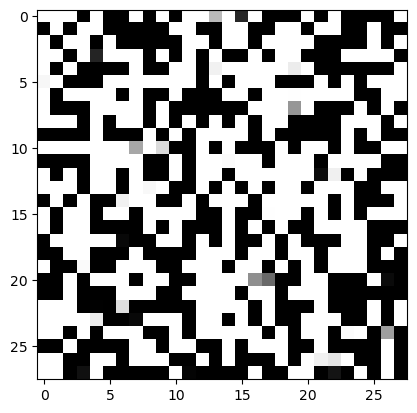

In [290]:
image = G(torch.randn(1, 100)).view(28, 28).detach()
plt.imshow(image, cmap='gray')

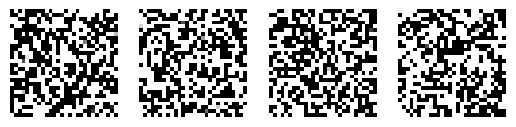

In [292]:
  with torch.no_grad():
      fake = G(static_noise)
      fake = fake.view(-1, 28, 28)
      fig, ax = plt.subplots(1, 4)
      for i in range(4):
          ax[i].imshow(fake[i], cmap='gray')
          ax[i].axis('off')
